# Retificador de meia onda (Carga R/C)

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

0.8417866778757644
# - Tensão na carga - # 
V_pk:	 169.7056274847714 
Vm: 	 148.10777383534565 
Vrms: 	 148.66085992667394
# - Corrente na carga - # 
Ipk: 	 4.252920088803067 
Im: 	 3.172173592196899e-11 
Irms: 	 0.9125742062670614
# - Potências - # 
Ppk:	 539.1891852456271 
P: 	 -8.160230672422904e-09 
S: 	 109.50890475204737
# - Fatores - # 
FP:	 -7.451659470889138e-11 
THD V:	 13.5853310628972 
THD I:	 1.9789706943201568


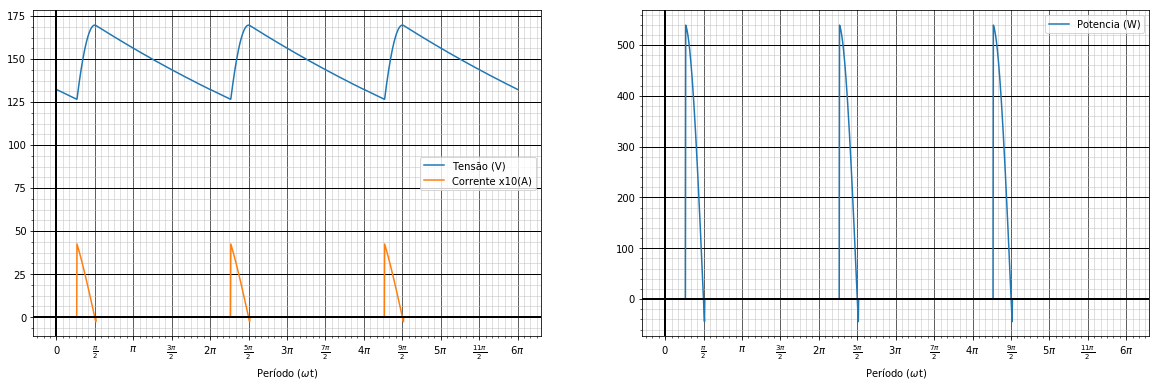

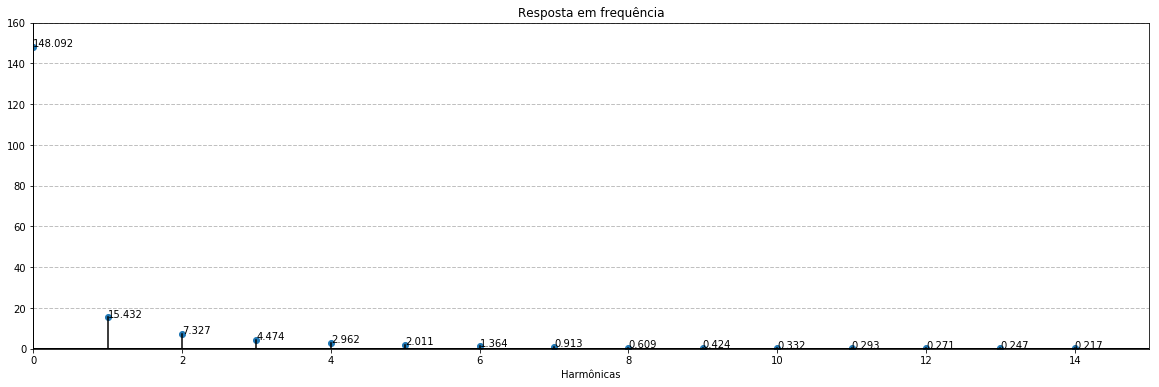

In [4]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA RC ####################
V_pk = 120*sqrt(2)
Freq = 60
R = 500
C = 100e-6

w = 2*pi*Freq

XC = 1 / (w * C)
#XC = 50

XRC = complex(R,-XC)
#XRC = 100 - 30j

Z = abs(XRC)

teta = pi - atan(w*R*C)
#(r, phi) = polar(z)
tal = 1 / (R * C)

T = 2*pi

func_a = sym.lambdify('x', f'sin(x) - sin({teta})*exp(-(2*{pi}+x-{teta})/{w*R*C})', 'numpy')
a = scipy.optimize.fsolve(func_a, 0)
a = a[0]
print(a)

func_v1 = f'({V_pk}*sin({teta})*exp(-((x+2*{pi})-{teta})/({w*R*C}))*( 1 - heaviside(x - {a}, 0) + {eps} ))+'
func_v2 = f'({V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps} )) + '
func_v3 = f'({V_pk}*sin({teta})*exp(-(x-{teta})/({w*R*C})) * heaviside(x - {teta}, 0))'

func_v = func_v1 + func_v2 + func_v3
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i_c_d_on = f'{w*C*V_pk}*cos(x)*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps} )' 
func_i_c_d_off_1 = f'{-(V_pk*sin(teta))/R}*exp(-((x+2*{pi})-{teta})/({w*R*C}))*( 1 - heaviside(x - {a}, 0) + {eps} )'
func_i_c_d_off_2 = f'{-(V_pk*sin(teta))/R}*exp(-(x-{teta})/({w*R*C}))* heaviside(x - {teta}, 0)'

func_i = '(' + func_i_c_d_on + ')+(' + func_i_c_d_off_1 + ')+(' + func_i_c_d_off_2 + ')'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nV_pk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i_c_d_on, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)